<a href="https://colab.research.google.com/github/Anujpratap9997/DeepLearning/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement a Simple RNN model using IDMB dataset

In [1]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=imdb.load_data()

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
X_train=pad_sequences(X_train,padding='post',maxlen=50)
X_test=pad_sequences(X_test,padding='post',maxlen=50)

In [4]:
X_train.shape

(25000, 50)

In [5]:
model = Sequential()
model.add(Embedding(1000, 2,50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 2)           2000      
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3153 (12.32 KB)
Trainable params: 3153 (12.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 79s 89ms/step - loss: 0.6902 - acc: 0.5271 - val_loss: 0.6783 - val_acc: 0.5561
Epoch 2/5
782/782 [==============================] - 50s 63ms/step - loss: 0.5533 - acc: 0.7074 - val_loss: 0.4769 - val_acc: 0.7767
Epoch 3/5
782/782 [==============================] - 90s 115ms/step - loss: 0.4551 - acc: 0.7873 - val_loss: 0.4543 - val_acc: 0.7901
Epoch 4/5
782/782 [==============================] - 69s 88ms/step - loss: 0.4366 - acc: 0.8028 - val_loss: 0.4603 - val_acc: 0.7838
Epoch 5/5
782/782 [==============================] - 49s 62ms/step - loss: 0.4273 - acc: 0.8085 - val_loss: 0.5047 - val_acc: 0.7700


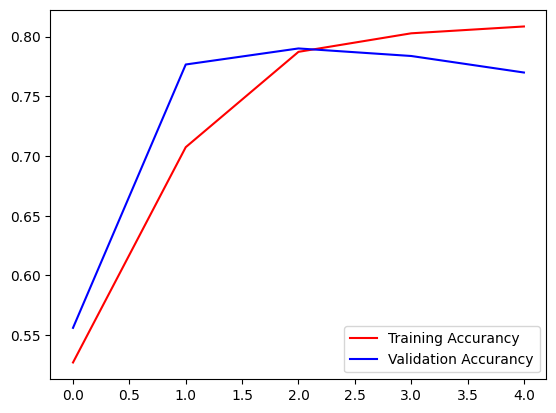

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],color='red',label="Training Accurancy")
plt.plot(history.history['val_acc'],color='blue',label="Validation Accurancy")
plt.legend()
plt.show()